# Tasca M6 T02

Exercicis per practicar amb regressions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# configurar els gràfics
sns.set_style('whitegrid')
sns.set_palette('flare')

In [3]:
# Llegir l'arxiu
rawhousing = pd.read_csv("C:/Users/Patricia/Downloads/housingdataM6.csv", sep=',', header=None)

In [4]:
# Afegir els noms de les columnes
rawhousing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PRATIO', 'B_1000', 'LSTAT', 'MEDV']

In [5]:
# Carregar l'informació adicional del dataset
info_columnes = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
    'NOX' : 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per 10,000 dollars',
    'PRATIO': 'pupil-teacher ratio by town',
    'B_1000': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000\'s'
}

In [6]:
housing_orig = pd.DataFrame(rawhousing) 

### Preprocessat

In [7]:
from sklearn.preprocessing import RobustScaler
rawhousing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']] = RobustScaler().fit_transform(rawhousing[['CRIM', 'ZN', 'LSTAT', 'MEDV', 'AGE']])

In [8]:
from sklearn.preprocessing import StandardScaler
rawhousing[['TAX','INDUS','PRATIO','RM','NOX']] = StandardScaler().fit(rawhousing[['TAX','INDUS','PRATIO','RM','NOX']]).transform(rawhousing[['TAX','INDUS','PRATIO','RM','NOX']])

In [9]:
from sklearn.preprocessing import MinMaxScaler
rawhousing[['DIS', 'RAD','B_1000','CRIM','ZN']] = MinMaxScaler().fit_transform(rawhousing[['DIS','RAD', 'B_1000','CRIM','ZN']])

In [10]:
housing_def = pd.DataFrame(rawhousing) 

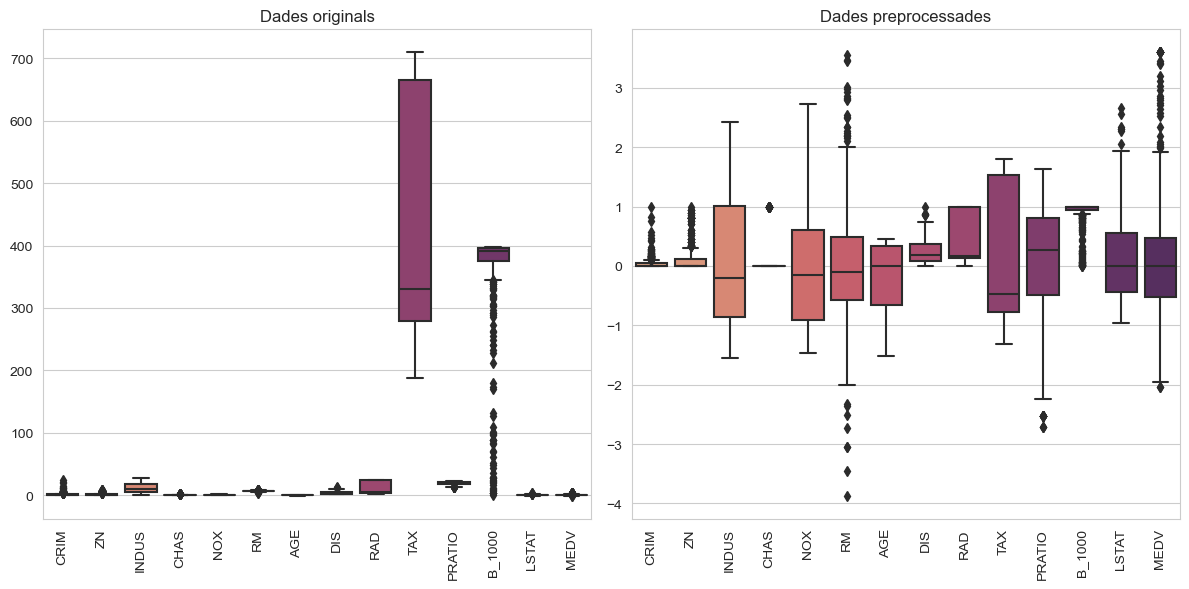

In [11]:
#Gràfic comparatiu

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot del dataset original
sns.boxplot(data=housing_orig, ax=axes[0], palette='flare')
axes[0].set_title('Dades originals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot del dataset modificat
sns.boxplot(data=housing_def, ax=axes[1], palette='flare')
axes[1].set_title('Dades preprocessades')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

## Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [12]:
import statsmodels.api as sm

In [13]:
target = pd.DataFrame(housing_def['MEDV'], columns=["MEDV"])

    Fem un bucle for que faci un model per cada variable, després obtindrem els resums de tots ordenats pel coeficient de determinació

In [14]:
from sklearn.model_selection import train_test_split

# Assignar VD/VI
X = housing_def[['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT']]
y = housing_def['MEDV']

#Afegir els noms de les columnes
X.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B_1000', 'LSTAT']
y.columns = 'MEDV'

#Fer la divisió dels conjunts
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
y_train

477   -1.153605
15    -0.163009
332   -0.225705
423   -0.978056
19    -0.376176
         ...   
106   -0.213166
270   -0.012539
348    0.413793
435   -0.978056
102   -0.326019
Name: MEDV, Length: 404, dtype: float64

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
r_sq = model.score(x_train, y_train)
print(f"Coeficient de determinació: {r_sq}")

coefficient of determination: 0.7403517718273758


In [27]:
y_pred = model.intercept_ + model.coef_ * x_train
print(f"Predicció:\n{y_pred}")

predicted response:
         CRIM        ZN     INDUS      CHAS        RM       AGE       DIS  \
477 -0.423409 -0.227973 -0.257449 -0.227973 -0.791719 -0.278656 -0.374260   
15  -0.236056 -0.227973 -0.215288 -0.227973 -0.487033 -0.174219 -0.735478   
332 -0.228342 -0.076212 -0.206483 -0.227973 -0.373782 -0.089236 -1.058164   
423 -0.319647 -0.227973 -0.257449 -0.227973 -0.332391 -0.247427 -0.362374   
19  -0.237337 -0.227973 -0.215288 -0.227973 -0.548545 -0.207495 -0.629714   
..        ...       ...       ...       ...       ...       ...       ...   
106 -0.230119 -0.227973 -0.217066 -0.227973 -0.485884 -0.264833 -0.390875   
270 -0.231784 -0.141253 -0.210293 -0.227973 -0.474386 -0.137359 -0.724994   
348 -0.228086  0.118910 -0.189339 -0.227973 -0.026556 -0.105618 -1.314748   
435 -0.373135 -0.227973 -0.257449 -0.227973 -0.030005 -0.271745 -0.377875   
102 -0.230868 -0.227973 -0.217066 -0.227973 -0.158778 -0.248195 -0.466752   

          RAD       TAX    PRATIO    B_1000     LSTAT  

    Podriem parlar doncs d'un alt nivell de determinació i per tant una influència forta

In [28]:
import statsmodels.api as sm

# Crear una lista para almacenar los resultados de los modelos
results = []

# Iterar sobre todas las columnas en housing_def
for column in housing_def.columns:
    x = housing_def[column]
    y = target["MEDV"]

    # Ajustar el modelo de regresión lineal
    model = sm.OLS(y, x).fit()

    # Guardar los resultados en la lista
    results.append((column, model.rsquared, model))

# Ordenar los resultados por el valor del coeficiente de determinación (R^2) en orden descendente
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

# Imprimir los resultados ordenados
for column, r_squared, model in results_sorted:
    print(f"Variable: {column}")
    print(f"R-squared: {r_squared}")
    print(model.summary())
    print("------------------------")


Variable: MEDV
R-squared: 1.0
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.374e+33
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                        0.00
Time:                        09:49:18   Log-Likelihood:                          17073.
No. Observations:                 506   AIC:                                 -3.414e+04
Df Residuals:                     505   BIC:                                 -3.414e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
------------------------
Variable: CRIM
R-squared: 0.0892598901585937
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.087
Method:                 Least Squares   F-statistic:                              49.49
Date:                Wed, 14 Jun 2023   Prob (F-statistic):                    6.51e-12
Time:                        09:49:18   Log-Likelihood:                         -771.24
No. Observations:                 506   AIC:                                      1544.
Df Residuals:                     505   BIC:                                      1549.
Df Model:                           1                                                  
Covariance Type:            nonrobust         

## Exercici 2
Compara’ls en base al MSE i al R2.

In [ ]:
també necessitaria el mse que no me sale en el summary

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

## Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

## Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.